### GẮN DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.mkdir('/content/datasets')

In [ ]:
!pip install shap
!pip install eli5

     |████████████████████████████████| 371 kB 28.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509250 sha256=b054ebf6928041330706fe9d6c6d377ec46057f63102f3dee26dfe606d8587b8
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
     |████████████████████████████████| 106 kB 42.2 MB/s 


In [ ]:
import shutil
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from matplotlib import pyplot
import shap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
shutil.unpack_archive('/content/drive/MyDrive/AI course/archive_4.zip', '/content/datasets')

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/datasets/junction_postvip_sum_6mon_enr/junction_postvip_sum_6mon_enr.txt',sep='|', index_col=None, header=None)

In [ ]:
df.columns = ['ID',
'sum_total_use_charge_tn','sum_total_use_charge_tn_1','sum_total_use_charge_tn_2','sum_total_use_charge_tn_3','sum_total_use_charge_tn_4','sum_total_use_charge_tn_5',
'sum_total_A s_tn','sum_total_A s_tn_1','sum_total_A s_tn_2','sum_total_A s_tn_3','sum_total_A s_tn_4','sum_total_A s_tn_5',
'sum_free_service_fee_tn','sum_free_service_fee_tn_1','sum_free_service_fee_tn_2','sum_free_service_fee_tn_3','sum_free_service_fee_tn_4','sum_free_service_fee_tn_5',
'sum_t_A_charge_tn','sum_t_A_charge_tn_1','sum_t_A_charge_tn_2','sum_t_A_charge_tn_3','sum_t_A_charge_tn_4','sum_t_A_charge_tn_5',
'sum_t_dịch vụ B_charge_tn','sum_t_dịch vụ B_charge_tn_1','sum_t_dịch vụ B_charge_tn_2','sum_t_dịch vụ B_charge_tn_3','sum_t_dịch vụ B_charge_tn_4','sum_t_dịch vụ B_charge_tn_5',
'sum_t_dịch vụ B_times_tn','sum_t_dịch vụ B_times_tn_1','sum_t_dịch vụ B_times_tn_2','sum_t_dịch vụ B_times_tn_3','sum_t_dịch vụ B_times_tn_4','sum_t_dịch vụ B_times_tn_5',
'sum_t_A _times_tn','sum_t_A _times_tn_1','sum_t_A _times_tn_2','sum_t_A _times_tn_3','sum_t_A _times_tn_4','sum_t_A _times_tn_5',
'sum_total_use_A s_tn','sum_total_use_A s_tn_1','sum_total_use_A s_tn_2','sum_total_use_A s_tn_3','sum_total_use_A s_tn_4','sum_total_use_A s_tn_5',
'sum_t_A _duration_tn','sum_t_A _duration_tn_1','sum_t_A _duration_tn_2','sum_t_A _duration_tn_3','sum_t_A _duration_tn_4','sum_t_A _duration_tn_5',
'customer_age',
'sum_D_other_charge_tn','sum_D_other_charge_tn_1','sum_D_other_charge_tn_2','sum_D_other_charge_tn_3','sum_D_other_charge_tn_4','sum_D_other_charge_tn_5',
'sum_C_charge_tn','sum_C_charge_tn_1','sum_C_charge_tn_2','sum_C_charge_tn_3','sum_C_charge_tn_4','sum_C_charge_tn_5',
'sum_C_times_tn','sum_C_times_tn_1','sum_C_times_tn_2','sum_C_times_tn_3','sum_C_times_tn_4','sum_C_times_tn_5',
'sum_E  _times_tn','sum_E  _times_tn_1','sum_E  _times_tn_2','sum_E  _times_tn_3','sum_E  _times_tn_4','sum_E  _times_tn_5',
'sum_E  _duration_tn','sum_E  _duration_tn_1','sum_E  _duration_tn_2','sum_E  _duration_tn_3','sum_E  _duration_tn_4','sum_E  _duration_tn_5',
'sum_F _times_tn','sum_F _times_tn_1','sum_F _times_tn_2','sum_F _times_tn_3','sum_F _times_tn_4','sum_F _times_tn_5',
'sum_F _charge_tn','sum_F _charge_tn_1','sum_F _charge_tn_2','sum_F _charge_tn_3','sum_F _charge_tn_4','sum_F _charge_tn_5',
'sum_E _charge_tn','sum_E _charge_tn_1','sum_E _charge_tn_2','sum_E _charge_tn_3','sum_E _charge_tn_4','sum_E _charge_tn_5',
'sum_G  _times_tn','sum_G  _times_tn_1','sum_G  _times_tn_2','sum_G  _times_tn_3','sum_G  _times_tn_4','sum_G  _times_tn_5',
'sum_G  _duration_tn','sum_G  _duration_tn_1','sum_G  _duration_tn_2','sum_G  _duration_tn_3','sum_G  _duration_tn_4','sum_G  _duration_tn_5',
'sum_G _charge_tn','sum_G _charge_tn_1','sum_G _charge_tn_2','sum_G _charge_tn_3','sum_G _charge_tn_4','sum_G _charge_tn_5',
'sum_H_times_tn','sum_H_times_tn_1','sum_H_times_tn_2','sum_H_times_tn_3','sum_H_times_tn_4','sum_H_times_tn_5',
'sum_H_charge_tn','sum_H_charge_tn_1','sum_H_charge_tn_2','sum_H_charge_tn_3','sum_H_charge_tn_4','sum_H_charge_tn_5',
'sum_M_volume_tn','sum_M_volume_tn_1','sum_M_volume_tn_2','sum_M_volume_tn_3','sum_M_volume_tn_4','sum_M_volume_tn_5',
'sum_M_times_tn','sum_M_times_tn_1','sum_M_times_tn_2','sum_M_times_tn_3','sum_M_times_tn_4','sum_M_times_tn_5',
'sum_M_charge_tn','sum_M_charge_tn_1','sum_M_charge_tn_2','sum_M_charge_tn_3','sum_M_charge_tn_4','sum_M_charge_tn_5',
'churn']

In [ ]:
df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919361 entries, 0 to 919360
Data columns (total 153 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           919361 non-null  int64  
 1   sum_total_use_charge_tn      919361 non-null  float64
 2   sum_total_use_charge_tn_1    919361 non-null  float64
 3   sum_total_use_charge_tn_2    919361 non-null  float64
 4   sum_total_use_charge_tn_3    919361 non-null  float64
 5   sum_total_use_charge_tn_4    919361 non-null  float64
 6   sum_total_use_charge_tn_5    919361 non-null  float64
 7   sum_total_A s_tn             919361 non-null  float64
 8   sum_total_A s_tn_1           919361 non-null  float64
 9   sum_total_A s_tn_2           919361 non-null  float64
 10  sum_total_A s_tn_3           919361 non-null  float64
 11  sum_total_A s_tn_4           919361 non-null  float64
 12  sum_total_A s_tn_5           919361 non-null  float64
 13

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.describe()

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,sum_total_A s_tn_3,sum_total_A s_tn_4,sum_total_A s_tn_5,sum_free_service_fee_tn,sum_free_service_fee_tn_1,sum_free_service_fee_tn_2,sum_free_service_fee_tn_3,sum_free_service_fee_tn_4,sum_free_service_fee_tn_5,sum_t_A_charge_tn,sum_t_A_charge_tn_1,sum_t_A_charge_tn_2,sum_t_A_charge_tn_3,sum_t_A_charge_tn_4,sum_t_A_charge_tn_5,sum_t_dịch vụ B_charge_tn,sum_t_dịch vụ B_charge_tn_1,sum_t_dịch vụ B_charge_tn_2,sum_t_dịch vụ B_charge_tn_3,sum_t_dịch vụ B_charge_tn_4,sum_t_dịch vụ B_charge_tn_5,sum_t_dịch vụ B_times_tn,sum_t_dịch vụ B_times_tn_1,sum_t_dịch vụ B_times_tn_2,sum_t_dịch vụ B_times_tn_3,sum_t_dịch vụ B_times_tn_4,sum_t_dịch vụ B_times_tn_5,sum_t_A _times_tn,sum_t_A _times_tn_1,sum_t_A _times_tn_2,sum_t_A _times_tn_3,sum_t_A _times_tn_4,sum_t_A _times_tn_5,sum_total_use_A s_tn,sum_total_use_A s_tn_1,sum_total_use_A s_tn_2,sum_total_use_A s_tn_3,sum_total_use_A s_tn_4,sum_total_use_A s_tn_5,sum_t_A _duration_tn,sum_t_A _duration_tn_1,sum_t_A _duration_tn_2,sum_t_A _duration_tn_3,sum_t_A _duration_tn_4,sum_t_A _duration_tn_5,customer_age,sum_D_other_charge_tn,sum_D_other_charge_tn_1,sum_D_other_charge_tn_2,sum_D_other_charge_tn_3,sum_D_other_charge_tn_4,sum_D_other_charge_tn_5,sum_C_charge_tn,sum_C_charge_tn_1,sum_C_charge_tn_2,sum_C_charge_tn_3,sum_C_charge_tn_4,sum_C_charge_tn_5,sum_C_times_tn,sum_C_times_tn_1,sum_C_times_tn_2,sum_C_times_tn_3,sum_C_times_tn_4,sum_C_times_tn_5,sum_E _times_tn,sum_E _times_tn_1,sum_E _times_tn_2,sum_E _times_tn_3,sum_E _times_tn_4,sum_E _times_tn_5,sum_E _duration_tn,sum_E _duration_tn_1,sum_E _duration_tn_2,sum_E _duration_tn_3,sum_E _duration_tn_4,sum_E _duration_tn_5,sum_F _times_tn,sum_F _times_tn_1,sum_F _times_tn_2,sum_F _times_tn_3,sum_F _times_tn_4,sum_F _times_tn_5,sum_F _charge_tn,sum_F _charge_tn_1,sum_F _charge_tn_2,sum_F _charge_tn_3,sum_F _charge_tn_4,sum_F _charge_tn_5,sum_E _charge_tn,sum_E _charge_tn_1,sum_E _charge_tn_2,sum_E _charge_tn_3,sum_E _charge_tn_4,sum_E _charge_tn_5,sum_G _times_tn,sum_G _times_tn_1,sum_G _times_tn_2,sum_G _times_tn_3,sum_G _times_tn_4,sum_G _times_tn_5,sum_G _duration_tn,sum_G _duration_tn_1,sum_G _duration_tn_2,sum_G _duration_tn_3,sum_G _duration_tn_4,sum_G _duration_tn_5,sum_G _charge_tn,sum_G _charge_tn_1,sum_G _charge_tn_2,sum_G _charge_tn_3,sum_G _charge_tn_4,sum_G _charge_tn_5,sum_H_times_tn,sum_H_times_tn_1,sum_H_times_tn_2,sum_H_times_tn_3,sum_H_times_tn_4,sum_H_times_tn_5,sum_H_charge_tn,sum_H_charge_tn_1,sum_H_charge_tn_2,sum_H_charge_tn_3,sum_H_charge_tn_4,sum_H_charge_tn_5,sum_M_volume_tn,sum_M_volume_tn_1,sum_M_volume_tn_2,sum_M_volume_tn_3,sum_M_volume_tn_4,sum_M_volume_tn_5,sum_M_times_tn,sum_M_times_tn_1,sum_M_times_tn_2,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
count,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,9193

In [ ]:
df.isnull().sum()

ID                             0
sum_total_use_charge_tn        0
sum_total_use_charge_tn_1      0
sum_total_use_charge_tn_2      0
sum_total_use_charge_tn_3      0
sum_total_use_charge_tn_4      0
sum_total_use_charge_tn_5      0
sum_total_A s_tn               0
sum_total_A s_tn_1             0
sum_total_A s_tn_2             0
sum_total_A s_tn_3             0
sum_total_A s_tn_4             0
sum_total_A s_tn_5             0
sum_free_service_fee_tn        0
sum_free_service_fee_tn_1      0
sum_free_service_fee_tn_2      0
sum_free_service_fee_tn_3      0
sum_free_service_fee_tn_4      0
sum_free_service_fee_tn_5      0
sum_t_A_charge_tn              0
sum_t_A_charge_tn_1            0
sum_t_A_charge_tn_2            0
sum_t_A_charge_tn_3            0
sum_t_A_charge_tn_4            0
sum_t_A_charge_tn_5            0
sum_t_dịch vụ B_charge_tn      0
sum_t_dịch vụ B_charge_tn_1    0
sum_t_dịch vụ B_charge_tn_2    0
sum_t_dịch vụ B_charge_tn_3    0
sum_t_dịch vụ B_charge_tn_4    0
sum_t_dịch

In [ ]:
df.drop(columns=['ID'], inplace=True)

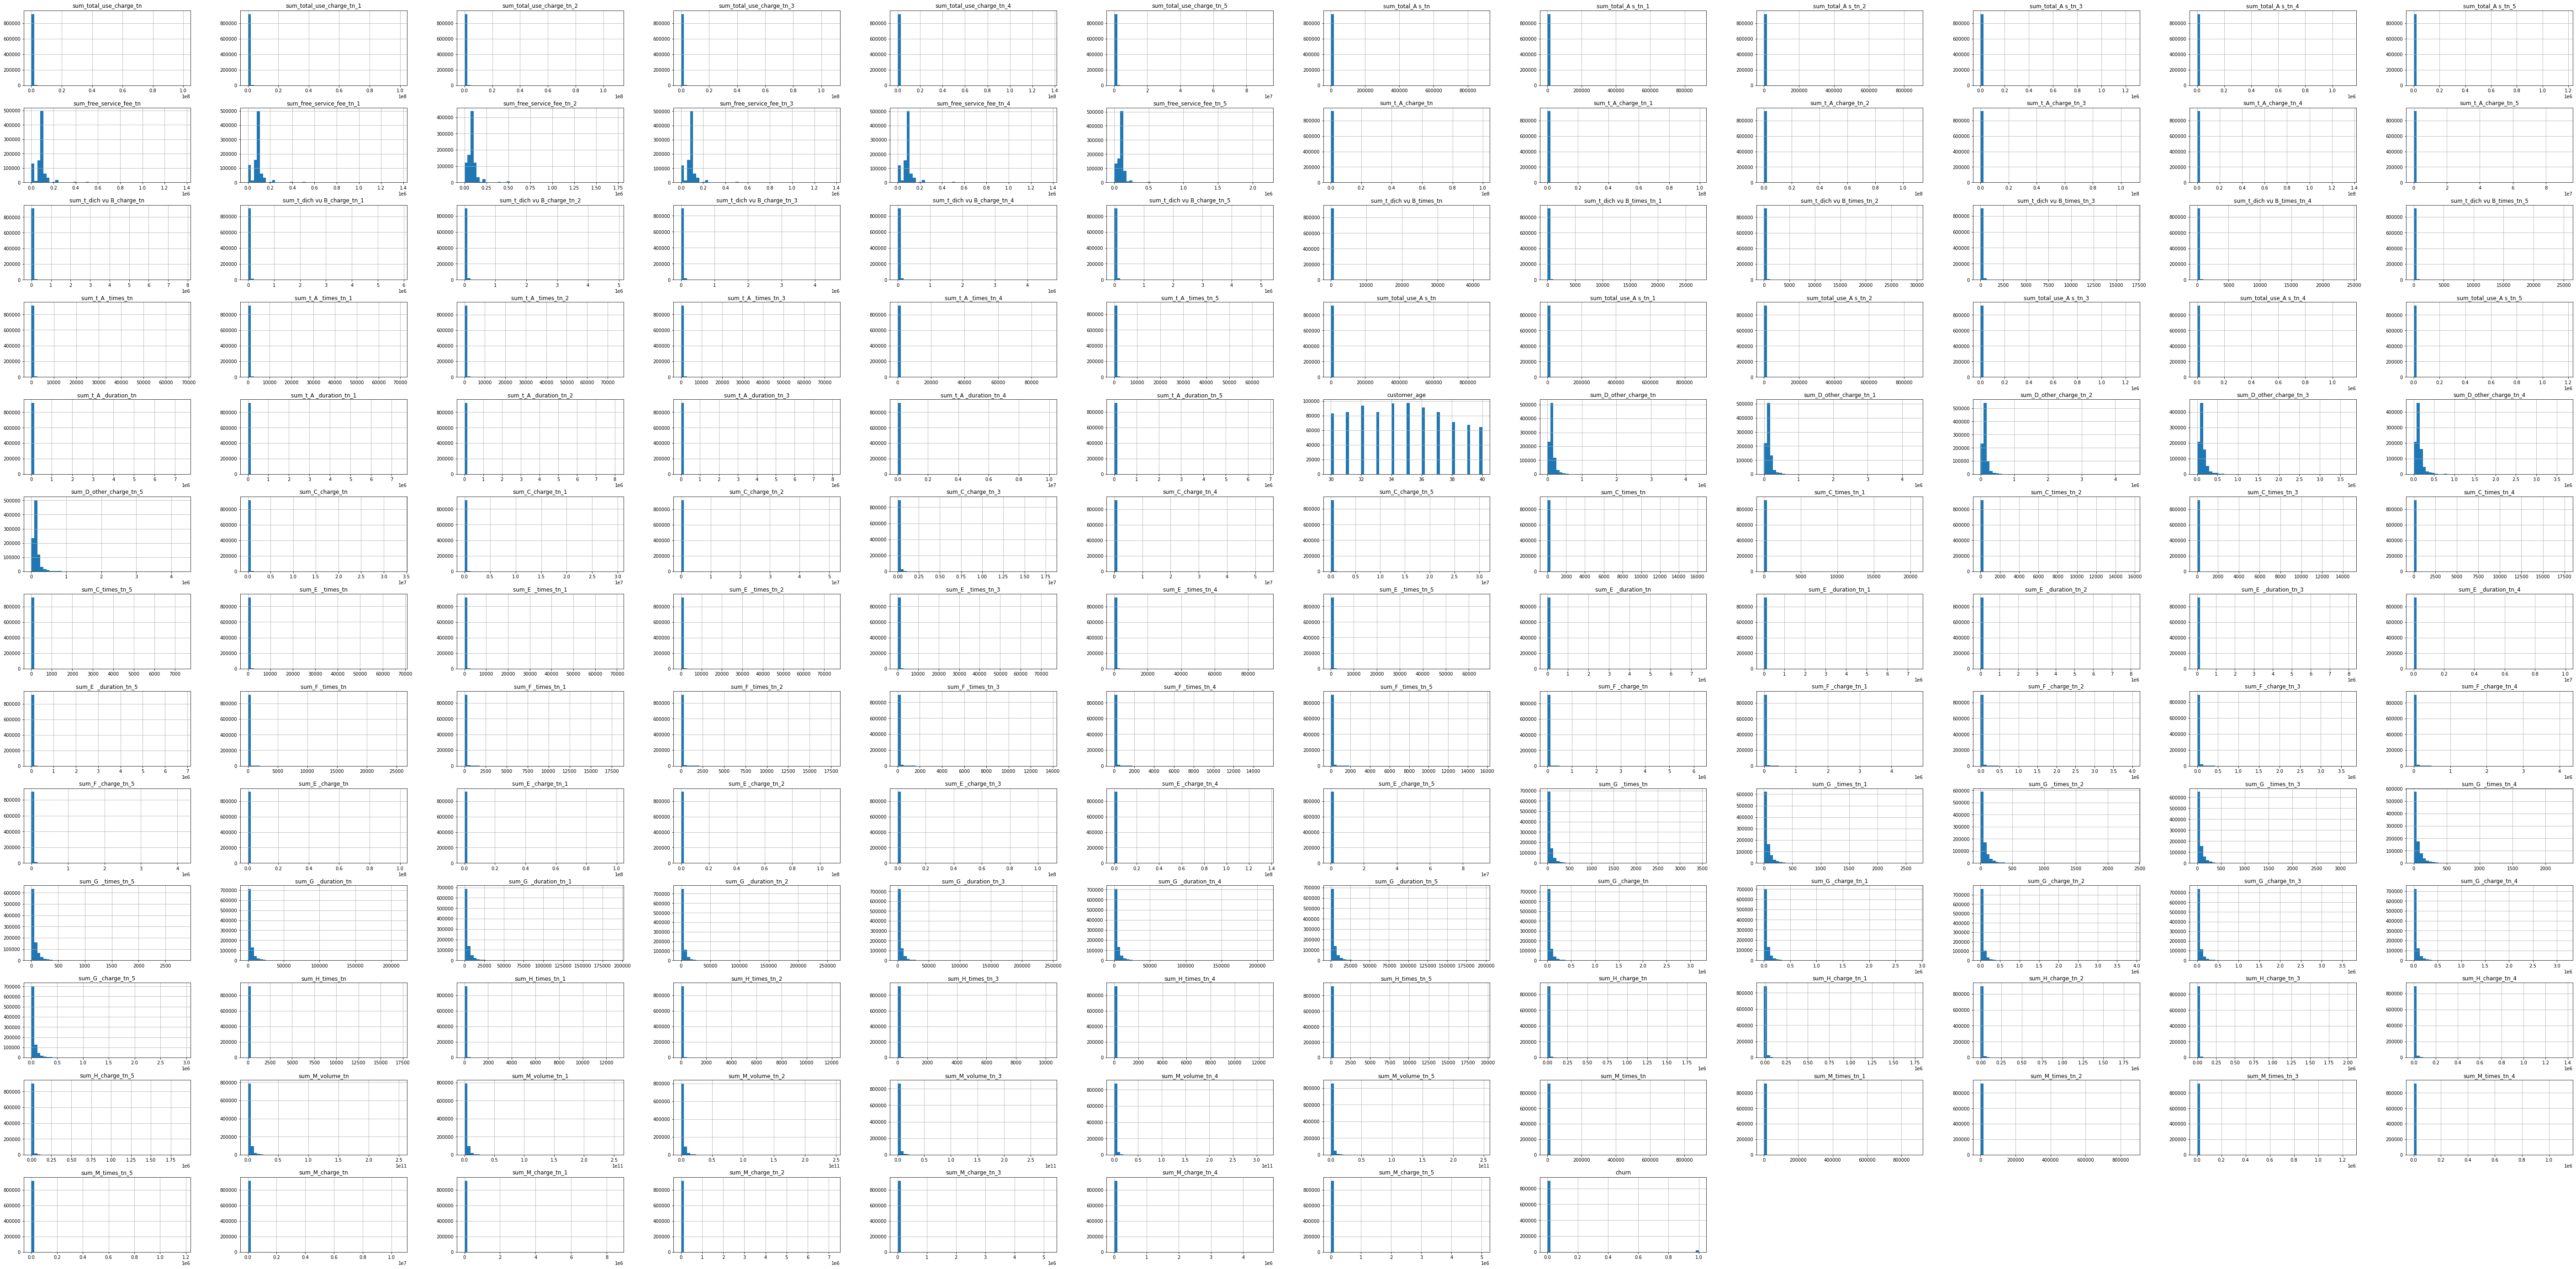

In [ ]:
df.hist(bins=50, figsize=(100,50))
plt.show()

In [ ]:
y=df['churn']

In [ ]:
df.drop(columns=['churn'], inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df)
data_scaled_features_X = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

In [ ]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled_features_X, y, test_size = 0.2)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
score = model.score(X_test, y_test)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    179193
           1       0.64      0.14      0.23      4680

    accuracy                           0.98    183873
   macro avg       0.81      0.57      0.61    183873
weighted avg       0.97      0.98      0.97    183873



In [ ]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(model,n_iter=2).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.0391 ± 0.0001,sum_G _duration_tn
0.0039 ± 0.0000,sum_G _charge_tn
0.0034 ± 0.0000,sum_free_service_fee_tn
0.0026 ± 0.0001,sum_G _charge_tn_5
0.0022 ± 0.0000,sum_G _charge_tn_4
0.0021 ± 0.0000,sum_D_other_charge_tn
0.0020 ± 0.0000,sum_free_service_fee_tn_1
0.0016 ± 0.0000,sum_G _charge_tn_3
0.0012 ± 0.0000,sum_total_A s_tn
0.0012 ± 0.0001,sum_F _charge_tn_4


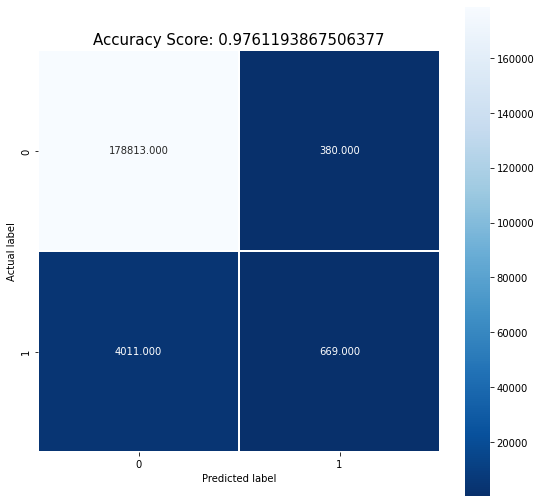

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [ ]:
np.savetxt('X_res.csv', X_res)

In [ ]:
np.savetxt('y_res.csv', y_res)

In [ ]:
name=['sum_total_use_charge_tn','sum_total_use_charge_tn_1','sum_total_use_charge_tn_2','sum_total_use_charge_tn_3','sum_total_use_charge_tn_4','sum_total_use_charge_tn_5',
'sum_total_A s_tn','sum_total_A s_tn_1','sum_total_A s_tn_2','sum_total_A s_tn_3','sum_total_A s_tn_4','sum_total_A s_tn_5',
'sum_free_service_fee_tn','sum_free_service_fee_tn_1','sum_free_service_fee_tn_2','sum_free_service_fee_tn_3','sum_free_service_fee_tn_4','sum_free_service_fee_tn_5',
'sum_t_A_charge_tn','sum_t_A_charge_tn_1','sum_t_A_charge_tn_2','sum_t_A_charge_tn_3','sum_t_A_charge_tn_4','sum_t_A_charge_tn_5',
'sum_t_dịch vụ B_charge_tn','sum_t_dịch vụ B_charge_tn_1','sum_t_dịch vụ B_charge_tn_2','sum_t_dịch vụ B_charge_tn_3','sum_t_dịch vụ B_charge_tn_4','sum_t_dịch vụ B_charge_tn_5',
'sum_t_dịch vụ B_times_tn','sum_t_dịch vụ B_times_tn_1','sum_t_dịch vụ B_times_tn_2','sum_t_dịch vụ B_times_tn_3','sum_t_dịch vụ B_times_tn_4','sum_t_dịch vụ B_times_tn_5',
'sum_t_A _times_tn','sum_t_A _times_tn_1','sum_t_A _times_tn_2','sum_t_A _times_tn_3','sum_t_A _times_tn_4','sum_t_A _times_tn_5',
'sum_total_use_A s_tn','sum_total_use_A s_tn_1','sum_total_use_A s_tn_2','sum_total_use_A s_tn_3','sum_total_use_A s_tn_4','sum_total_use_A s_tn_5',
'sum_t_A _duration_tn','sum_t_A _duration_tn_1','sum_t_A _duration_tn_2','sum_t_A _duration_tn_3','sum_t_A _duration_tn_4','sum_t_A _duration_tn_5',
'customer_age',
'sum_D_other_charge_tn','sum_D_other_charge_tn_1','sum_D_other_charge_tn_2','sum_D_other_charge_tn_3','sum_D_other_charge_tn_4','sum_D_other_charge_tn_5',
'sum_C_charge_tn','sum_C_charge_tn_1','sum_C_charge_tn_2','sum_C_charge_tn_3','sum_C_charge_tn_4','sum_C_charge_tn_5',
'sum_C_times_tn','sum_C_times_tn_1','sum_C_times_tn_2','sum_C_times_tn_3','sum_C_times_tn_4','sum_C_times_tn_5',
'sum_E  _times_tn','sum_E  _times_tn_1','sum_E  _times_tn_2','sum_E  _times_tn_3','sum_E  _times_tn_4','sum_E  _times_tn_5',
'sum_E  _duration_tn','sum_E  _duration_tn_1','sum_E  _duration_tn_2','sum_E  _duration_tn_3','sum_E  _duration_tn_4','sum_E  _duration_tn_5',
'sum_F _times_tn','sum_F _times_tn_1','sum_F _times_tn_2','sum_F _times_tn_3','sum_F _times_tn_4','sum_F _times_tn_5',
'sum_F _charge_tn','sum_F _charge_tn_1','sum_F _charge_tn_2','sum_F _charge_tn_3','sum_F _charge_tn_4','sum_F _charge_tn_5',
'sum_E _charge_tn','sum_E _charge_tn_1','sum_E _charge_tn_2','sum_E _charge_tn_3','sum_E _charge_tn_4','sum_E _charge_tn_5',
'sum_G  _times_tn','sum_G  _times_tn_1','sum_G  _times_tn_2','sum_G  _times_tn_3','sum_G  _times_tn_4','sum_G  _times_tn_5',
'sum_G  _duration_tn','sum_G  _duration_tn_1','sum_G  _duration_tn_2','sum_G  _duration_tn_3','sum_G  _duration_tn_4','sum_G  _duration_tn_5',
'sum_G _charge_tn','sum_G _charge_tn_1','sum_G _charge_tn_2','sum_G _charge_tn_3','sum_G _charge_tn_4','sum_G _charge_tn_5',
'sum_H_times_tn','sum_H_times_tn_1','sum_H_times_tn_2','sum_H_times_tn_3','sum_H_times_tn_4','sum_H_times_tn_5',
'sum_H_charge_tn','sum_H_charge_tn_1','sum_H_charge_tn_2','sum_H_charge_tn_3','sum_H_charge_tn_4','sum_H_charge_tn_5',
'sum_M_volume_tn','sum_M_volume_tn_1','sum_M_volume_tn_2','sum_M_volume_tn_3','sum_M_volume_tn_4','sum_M_volume_tn_5',
'sum_M_times_tn','sum_M_times_tn_1','sum_M_times_tn_2','sum_M_times_tn_3','sum_M_times_tn_4','sum_M_times_tn_5',
'sum_M_charge_tn','sum_M_charge_tn_1','sum_M_charge_tn_2','sum_M_charge_tn_3','sum_M_charge_tn_4','sum_M_charge_tn_5']

In [ ]:
df_X_res = pd.DataFrame(X_res)
df_X_res.columns=name

In [ ]:
model1 = LogisticRegression()
#Fitting the training data
model1.fit(X_res, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
data1 = y_res
df_y_res = pd.DataFrame(data1, columns = ['churn'])

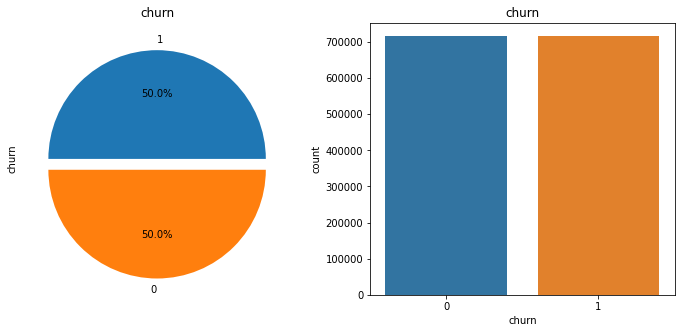

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_y_res['churn'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('churn')
sns.countplot('churn',data=df_y_res,ax=axes[1])
axes[1].set_title('churn')
plt.show()

In [ ]:
y_pre_2 = model1.predict(X_test)
score_2=model1.score(X_test,y_test)

In [ ]:
print('Logistic Regression')
print(confusion_matrix(y_test, y_pre_2))
print(classification_report(y_test, y_pre_2))

Logistic Regression
[[141952  37241]
 [  1126   3554]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    179193
           1       0.09      0.76      0.16      4680

    accuracy                           0.79    183873
   macro avg       0.54      0.78      0.52    183873
weighted avg       0.97      0.79      0.86    183873



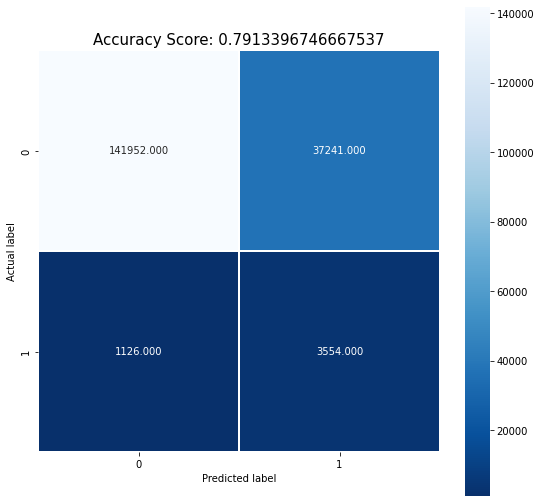

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pre_2)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_2)
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
shap.initjs()
# compute SHAP values
explainer = shap.LinearExplainer(model1, df_X_res, feature_dependence="independent")
shap_values = explainer.shap_values(df_X_res)

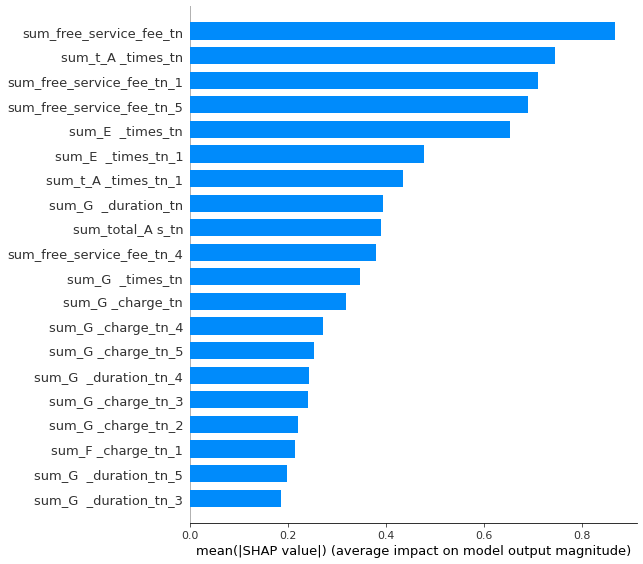

In [ ]:
shap.summary_plot(shap_values, df_X_res, plot_type='bar')

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(50,60),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

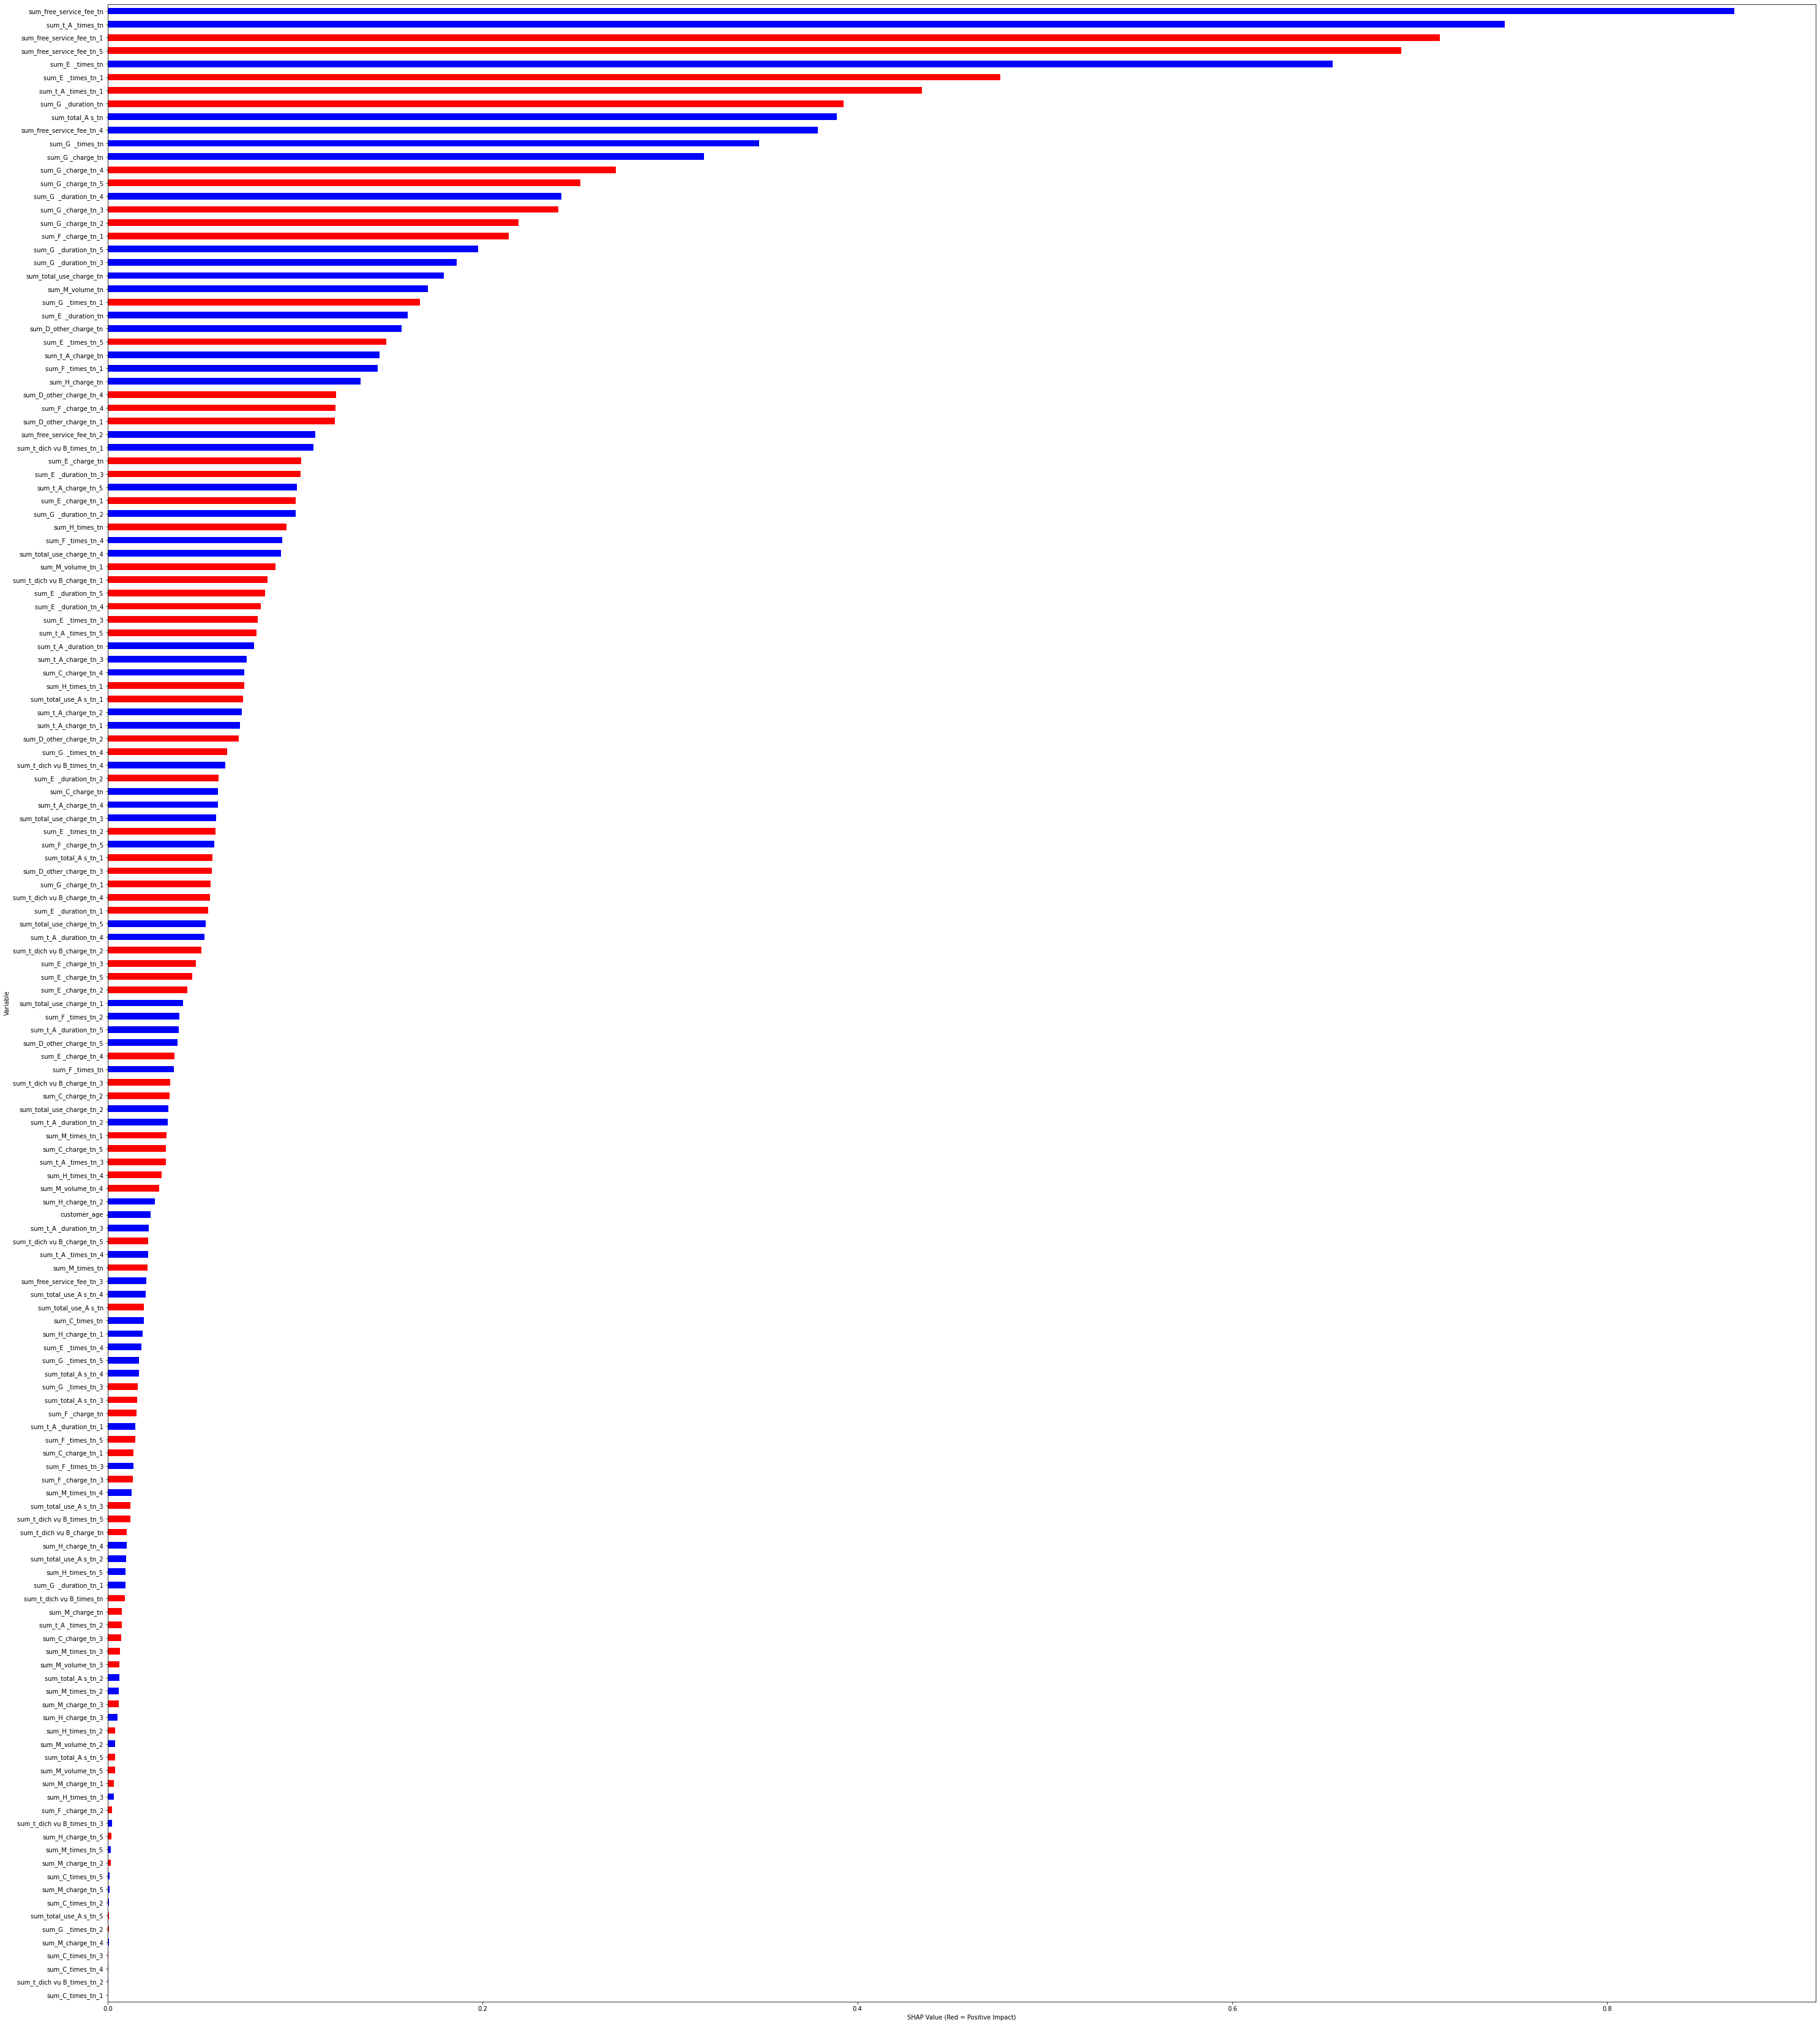

In [ ]:
ABS_SHAP(shap_values, df_X_res)

In [ ]:
ind = 0
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_res[ind,:],feature_names=name)


In [ ]:
ind = 2
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_res[ind,:],feature_names=name )

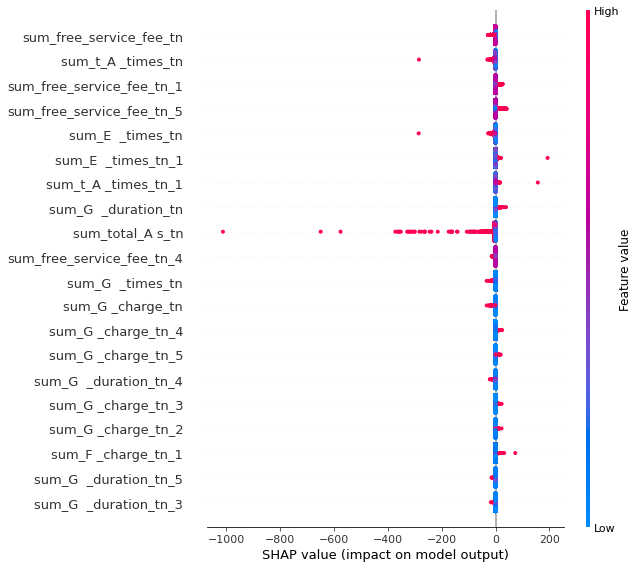

In [ ]:
shap.summary_plot(shap_values, df_X_res)

In [ ]:
df_X_res_sample=df_X_res.sample(n=50)

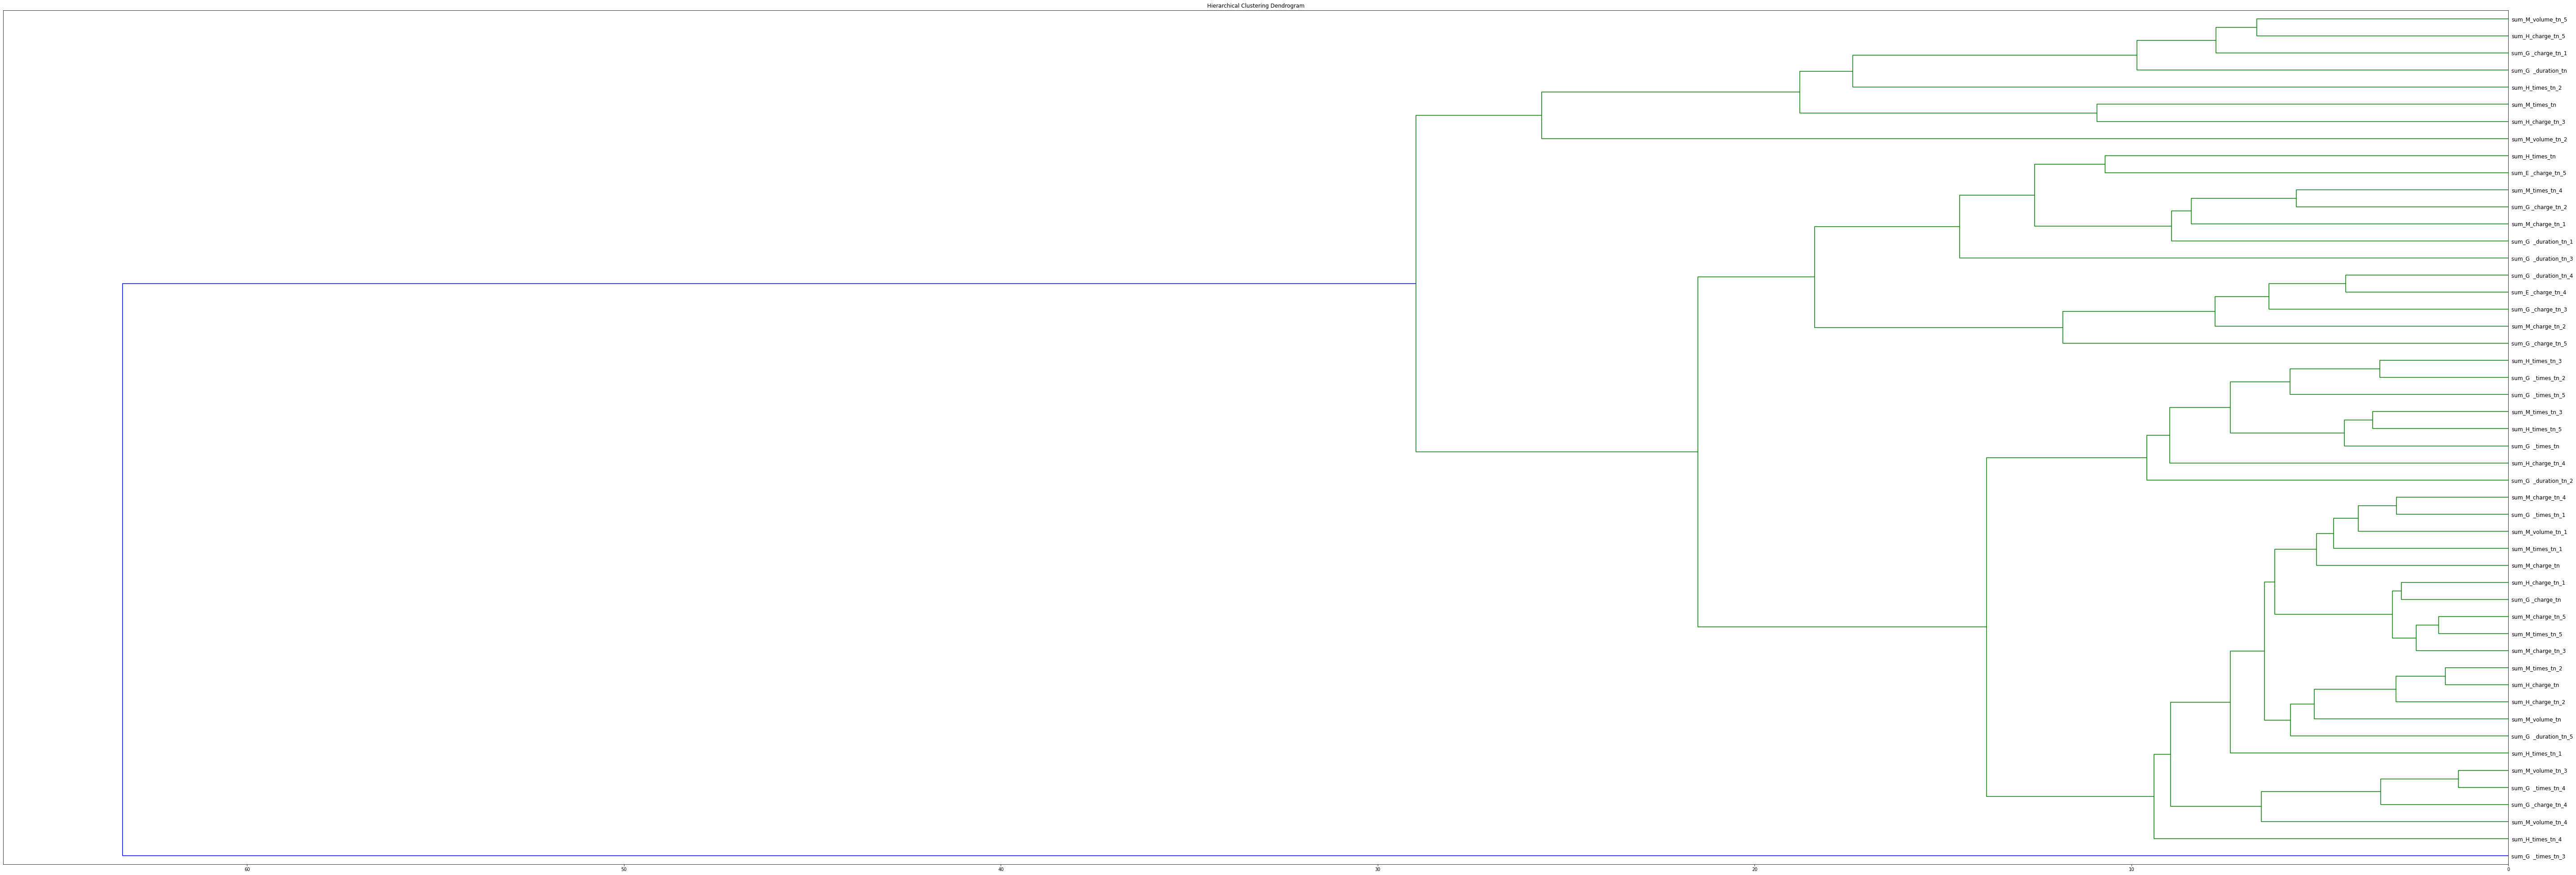

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(100,35))
Z = linkage(df_X_res_sample, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')

# Make the dendrogram
dendrogram(Z, orientation='left',labels=df_X_res_sample.columns.values, leaf_font_size=12)

# Show the graph
plt.show()

In [ ]:
Ta có: 
6200 người có số lần sử dụng dịch vụ = 0 --> không dùng = 6200
9100 người có tổng phí dịch vụ đấy   = 0 --> không dùng hoặc free --> ta có: không dùng + free = 9100 --> 6200 + free = 9100
